# ANALYZING GLOBAL HEALTH AND ENVIRONMENTAL TRENDS USING WORLD BANK DATA

# A Data-Driven Study with MySQL Database Integration and Python Analysis

---
### We greatly acknowledge the World Bank Group for the collection and sharing of the data.
---

The indicator descriptions below are based on the metadata provided with each dataset. For ‘Total Greenhouse Gas Emissions Including LULUCF (Mt CO2e),’ no metadata was available, so we conducted a brief research to understand it.

## Health Indicators Description

**1. Current Health Expenditure (% of GDP)**  
This indicator shows how much a country spends on health care compared to its total economic output (GDP). It includes the health services and goods that are used within the year. It does not cover long-term investments such as buildings, medical equipment, IT systems, or vaccine stockpiles for emergencies.

**2. People Using at Least Basic Drinking Water Services, Rural (% of Rural Population)**  
This indicator shows the share of rural residents who have access to at least basic drinking water services. It includes both basic and safely managed water services. Basic services refer to drinking water from an improved source, as long as the total round-trip collection time is under 30 minutes. Improved sources include piped water, boreholes, protected wells or springs, and packaged or delivered water.

**3. People Using at Least Basic Drinking Water Services, Urban (% of Urban Population)**  
This indicator shows the share of urban residents who have access to at least basic drinking water services. It includes both basic and safely managed water services. Basic services mean getting water from an improved source, as long as the total time to go there and return is under 30 minutes. Improved sources include piped water, boreholes, protected wells or springs, and packaged or delivered water.

**4. People Using Safely Managed Sanitation Services, Rural (% of Rural Population)**  
This indicator shows the share of rural residents who use improved sanitation facilities that are not shared with other households. It includes systems where waste is safely managed on-site or collected and treated offsite. Improved sanitation facilities include flush or pour-flush toilets connected to sewers, septic tanks or pit latrines, as well as ventilated improved pit latrines, composting toilets, and pit latrines with a slab.

**5. People Using Safely Managed Sanitation Services, Urban (% of Urban Population)**  
This indicator shows the share of urban residents who use improved sanitation facilities that are not shared with other households. It includes systems where waste is safely managed on-site or collected and treated offsite. Improved sanitation facilities include flush or pour-flush toilets connected to sewers, septic tanks or pit latrines, as well as ventilated improved pit latrines, composting toilets, and pit latrines with a slab.

## Environment Indicators Description

**6. Total Greenhouse Gas Emissions Including LULUCF (Mt CO2e)**  
This indicator measures the total greenhouse gas emissions of a country, including the effects of land use, land-use changes, and forestry (LULUCF), expressed in million tonnes of CO₂ equivalent. LULUCF accounts for carbon released or absorbed due to changes in land cover, such as deforestation, afforestation, or forest management. This gives a complete view of a country’s contribution to climate change.

**7. Population, Total**  
This indicator reports the total number of people living in a country, based on the de facto population concept. It counts all residents, no matter their legal status or citizenship. The figures represent estimates taken around the middle of each year.

**8. Renewable Energy Consumption (% of Total Final Energy Consumption)**  
This indicator shows the percentage of a country’s total final energy use that comes from renewable sources. It reflects how much of the energy consumed is produced from renewables instead of fossil fuels.

In [1]:
# Check that jupyter lab points to your project's environment directory
import sys
sys.executable

'C:\\Users\\Adespotos\\anaconda3\\envs\\bigdata_env\\python.exe'

# Import Libraries

In [2]:
import numpy as np  # Numerical computing library
import pandas as pd  # Data handling
import matplotlib.pyplot as plt  # Plotting library
import seaborn as sns  # An updated matplotlib (for better visualizations)
import pymysql  # MySQL database connector for Python
import chardet  # Library for automatic character encoding detection
import re  # Regular expressions for string manipulation and pattern matching

import custom_functions  # Custom functions for this project (e.g., CSV cleaning, encoding detection)

pd.options.display.max_columns = 100  # Display all columns

# DATA HARVESTING

# Read Datasets to DataFrames

A detailed exploration of the CSV files is necessary to ensure they can be read correctly into DataFrames.

We selected five health indicators and three environmental indicators. Some of these files are too complex to be read directly into DataFrames. The complexity became apparent when we realized that pandas.read_csv() could not handle the files properly, producing unreliable results.

Rather than choosing easier files, we took this as an opportunity to develop a step-by-step solution and learn as much as possible from the process. The Pythonic approach we followed includes the steps below:

1. Ensure the correct file encoding.
2. Fetch the CSV files into Python’s runtime (without using pandas, since it could not read the files correctly).
3. Explore the fetched CSV content to identify the issues.
4. Write scripts to address one problem at a time, progressing toward the final solution.

The indicators that required this special treatment were **"Population, total"** and **"Renewable energy consumption (% of total final energy consumption)"**. For this reason, we separated these two files from the rest, assigning them the notation 2, while the remaining files use the notation 1.

To handle the process described above, we also created three custom functions for reading and cleaning the CSV files. We also included docstrings in our functions to improve their readability and understanding.

Therefore, as the first preprocessing step, we create the lists with file paths and data abbreviations. The mechanics are simple: the first element of filepaths_1 corresponds to the first element of abbreviations_1. The same applies to filepaths_2 and abbreviations_2. So, the custom creation order of the list elements matters. These lists make automation easier and help map each file to its abbreviation.

In [3]:
# File paths for notation 1 ('che', 'wr', 'wu', 'sr', 'su', 'gem')
filepaths_1 = ['UPDATED CSV DATA - Intro to Big Data/Current health expenditure (% of GDP).csv',
               'UPDATED CSV DATA - Intro to Big Data/People using at least basic drinking water services, rural (% of rural population).csv',
               'UPDATED CSV DATA - Intro to Big Data/People using at least basic drinking water services, urban (% of urban population).csv',
               'UPDATED CSV DATA - Intro to Big Data/People using safely managed sanitation services, rural (% of rural population).csv',
               'UPDATED CSV DATA - Intro to Big Data/People using safely managed sanitation services, urban (% of urban population).csv',
               'UPDATED CSV DATA - Intro to Big Data/Total greenhouse gas emissions including LULUCF (Mt CO2e).csv']

# File paths for notation 2 ('pop', 'ren')
filepaths_2 = ['UPDATED CSV DATA - Intro to Big Data/Population, total.csv',
               'UPDATED CSV DATA - Intro to Big Data/Renewable energy consumption (% of total final energy consumption).csv']

# Abbreviations for easy mapping: notation 1
abbreviations_1 = ['che', 'wr', 'wu', 'sr', 'su', 'gem']

# Abbreviations for easy mapping: notation 2
abbreviations_2 = ['pop', 'ren']

### Step 1:

We use a function, leveraging chardet library's capabilities, to detect the file encoding, ensuring that no encoding issues occur when opening the CSV files in Python, which could otherwise disrupt our approach. We automated the process by iterating simultaneously over the abbreviations and filepaths lists. This type of iteration ensures that when Python processes element 0 of abbreviations, it also processes element 0 of filepaths, so each abbreviation corresponds to the correct file path.

**Notation 1 Files:**

In [4]:
# Dictionary to store detected encodings for each CSV file
encodings_1 = {}

# Iterate through abbreviations and filepaths together, detect encoding for each file
for abbreviation, filepath in zip(abbreviations_1, filepaths_1):
    encodings_1[abbreviation] = custom_functions.detect_encoding(filepath)

# Print the results to verify encodings
print("Here are the files' encodings: \n", encodings_1)

Here are the files' encodings: 
 {'che': 'UTF-8-SIG', 'wr': 'UTF-8-SIG', 'wu': 'UTF-8-SIG', 'sr': 'UTF-8-SIG', 'su': 'UTF-8-SIG', 'gem': 'UTF-8-SIG'}


**Notation 2 Files:**

In [5]:
# Dictionary to store detected encodings for each CSV file
encodings_2 = {}

# Iterate through abbreviations and filepaths together, detect encoding for each file
for abbreviation, filepath in zip(abbreviations_2, filepaths_2):
    encodings_2[abbreviation] = custom_functions.detect_encoding(filepath)

# Print the results to verify encodings
print("Here are the files' encodings: \n", encodings_2)

Here are the files' encodings: 
 {'pop': 'UTF-8-SIG', 'ren': 'UTF-8-SIG'}


At this point, all encodings are safely stored as values in a dictionary. Things seem simple because the encodings are currently the same. However, if they ever differ, each encoding can be accessed using the corresponding dictionary key. Even though the situation looks straightforward now, we follow a dynamic approach and retrieve the encodings through the dictionary keys instead of writing the encoding manually for each file.

### Step 2 & 3:

Since Pandas cannot handle reading these CSV files directly, we can use standard Python to load portions of a CSV file into memory. We can automate this process as before by iterating through both the filepaths and abbreviations lists and using a custom function that returns a selected line from each CSV file. We also use the repr() function, which is very helpful in situations like this, since the print() function often alters the displayed content. It is important to load the original CSV lines into memory without any changes to correctly identify the necessary actions to clean the files so that Pandas can read them successfully.

**Notation 1 Files:**

In [6]:
# Iterate through abbreviations and filepaths together, print a CSV line for each file
for abbreviation, filepath in zip(abbreviations_1, filepaths_1):
    csv_part = custom_functions.explore_csv(filepath=filepath, encoding=encodings_1[abbreviation], line_number=3)
    print(abbreviation + ":")
    print(repr(csv_part))  # repr() displays the string exactly as it is, unlike print() which might ruin special characters

che:
'Country Name;Country Code;Indicator Name;Indicator Code;1960;1961;1962;1963;1964;1965;1966;1967;1968;1969;1970;1971;1972;1973;1974;1975;1976;1977;1978;1979;1980;1981;1982;1983;1984;1985;1986;1987;1988;1989;1990;1991;1992;1993;1994;1995;1996;1997;1998;1999;2000;2001;2002;2003;2004;2005;2006;2007;2008;2009;2010;2011;2012;2013;2014;2015;2016;2017;2018;2019;2020;2021;2022;2023;2024\n'
wr:
'Country Name;Country Code;Indicator Name;Indicator Code;1960;1961;1962;1963;1964;1965;1966;1967;1968;1969;1970;1971;1972;1973;1974;1975;1976;1977;1978;1979;1980;1981;1982;1983;1984;1985;1986;1987;1988;1989;1990;1991;1992;1993;1994;1995;1996;1997;1998;1999;2000;2001;2002;2003;2004;2005;2006;2007;2008;2009;2010;2011;2012;2013;2014;2015;2016;2017;2018;2019;2020;2021;2022;2023;2024\n'
wu:
'Country Name;Country Code;Indicator Name;Indicator Code;1960;1961;1962;1963;1964;1965;1966;1967;1968;1969;1970;1971;1972;1973;1974;1975;1976;1977;1978;1979;1980;1981;1982;1983;1984;1985;1986;1987;1988;1989;1990;1991;

**Notation 2 Files:**

In [7]:
# Iterate through abbreviations and filepaths together, print a CSV line for each file
for abbreviation, filepath in zip(abbreviations_2, filepaths_2):
    csv_part = custom_functions.explore_csv(filepath=filepath, encoding=encodings_2[abbreviation], line_number=4)
    print(abbreviation + ":")
    print(repr(csv_part))  # repr() displays the string exactly as it is, unlike print() which ruins special characters

pop:
'"Country Name,""Country Code"",""Indicator Name"",""Indicator Code"",""1960"",""1961"",""1962"",""1963"",""1964"",""1965"",""1966"",""1967"",""1968"",""1969"",""1970"",""1971"",""1972"",""1973"",""1974"",""1975"",""1976"",""1977"",""1978"",""1979"",""1980"",""1981"",""1982"",""1983"",""1984"",""1985"",""1986"",""1987"",""1988"",""1989"",""1990"",""1991"",""1992"",""1993"",""1994"",""1995"",""1996"",""1997"",""1998"",""1999"",""2000"",""2001"",""2002"",""2003"",""2004"",""2005"",""2006"",""2007"",""2008"",""2009"",""2010"",""2011"",""2012"",""2013"",""2014"",""2015"",""2016"",""2017"",""2018"",""2019"",""2020"",""2021"",""2022"",""2023"",""2024"","\n'
ren:
'"Country Name,""Country Code"",""Indicator Name"",""Indicator Code"",""1960"",""1961"",""1962"",""1963"",""1964"",""1965"",""1966"",""1967"",""1968"",""1969"",""1970"",""1971"",""1972"",""1973"",""1974"",""1975"",""1976"",""1977"",""1978"",""1979"",""1980"",""1981"",""1982"",""1983"",""1984"",""1985"",""1986"",""1987"",""1988""

The above scripts, along with the custom function explore_csv, helped us identify the following:

1. All notation 1 files start at line number 3, whereas notation 2 files start at line number 4. The preceding lines contain metadata at both cases.
2. All notation 1 files use ';' as a separator, whereas notation 2 files use ','.
3. Rows in every file end with a newline character '\n'.
4. There are empty strings that should be manually converted to NaN values. Otherwise, pandas cannot recognize them as missing data.
5. Apart from the delimiter and the newline character at the end, the notation 1 files are clean, while notation 2 files include the following extra issues:  
    a. Each row ends with a comma followed by a quote, before the newline character: ',"\n'.  
    b. Quotes included in the data.  
    c. In 'pop', there is an extra comma in the column name 'Population, total', which causes pandas to treat 'Population' and 'total' as separate columns, even though they belong to the same column.  
    d. Each list element represents a row of the dataset.

Although the identification appears to be correct and effective, the order of execution of the above instructions is important. For instance, removing all quotes before applying rstrip() can lead to unreliable results.

### Step 4

We created a custom function to clean all files. The function is dynamic, meaning it can handle both notation 1 and notation 2 datasets. The only point that requires attention is that the function must accept different arguments depending on the file notation. As mentioned before, notation 2 files require special treatment.

We adopted a new approach by creating a third list that maps to the other two lists introduced earlier. This third list contains the names of the DataFrames.

**Reading Notation 1 Files to DataFrames:**

In [8]:
# List of the DataFrames for notation 1
dfnames_1 = ['df_che', 'df_wr', 'df_wu', 'df_sr', 'df_su', 'df_gem']

In [9]:
df_dict_1 = {}  # Initialize an empty dictionary to store the DataFrames

# Iterate through the three lists simultaneously.
# This works because the lists were created with the correct mapping order.
for df_name, abbreviation, filepath in zip(dfnames_1, abbreviations_1, filepaths_1):
    # Use the DataFrame name string as the key in the dictionary
    df_dict_1[df_name] = custom_functions.clean_csv(
        filepath=filepath,  # Path to the CSV file
        encoding=encodings_1[abbreviation],  # Retrieve encoding based on abbreviation
        separator=';',   # Set the column delimiter
        trail1='\n',  # First trailing character to remove
        trail2=None,  # Second trailing character to remove (optional)
        trail3=None,  # Third trailing character to remove (optional)
        to_be_replaced='"',  # Characters to replace (quotes in this case)
        start_row=3  # Row index corresponding to column headers
    )

# Extract the DataFrames from the dictionary and assign to variables
df_che = df_dict_1['df_che']
df_wr  = df_dict_1['df_wr']
df_wu  = df_dict_1['df_wu']
df_sr  = df_dict_1['df_sr']
df_su  = df_dict_1['df_su']
df_gem = df_dict_1['df_gem']

**Reading Notation 2 Files to DataFrames:**

In [10]:
# List of the DataFrames for notation 2
dfnames_2 = ['df_pop', 'df_ren']

In [11]:
df_dict_2 = {}

for df_name, abbreviation, filepath in zip(dfnames_2, abbreviations_2, filepaths_2):
    df_dict_2[df_name] = custom_functions.clean_csv(
        filepath=filepath,
        encoding=encodings_2[abbreviation],
        separator=',',
        trail1='\n',
        trail2='"',
        trail3=',',
        to_be_replaced='"',
        start_row=4
    )
    
df_pop = df_dict_2['df_pop']
df_ren = df_dict_2['df_ren']

# Quick Exploration on Data Integrity & Observations 

The results appear reliable, as all DataFrames have the same shape and identical column names. A quick inspection suggests that our cleaning process has been effective. All indicators are related to countries, so the 266 rows represent countries and territories worldwide. The 193 sovereign countries are included, but the additional rows correspond to non-independent territories, overseas dependencies and entire regions, such as Puerto Rico, Hong Kong, Bermuda, Africa Eastern and Southern. Arab World etc.

The indicators’ data have been collected from 1960 to the present (2024). There are several reasons why 1960 is used as the starting year. By this time, most countries had rebuilt or established functioning statistical offices after World War II, enabling systematic and comparable data collection. Additionally, decolonization and the formation of new countries occurred primarily in the 1950s and 1960s. Many nations became independent around this period, so data prior to 1960 would often be incomplete, inconsistent, or recorded under colonial administrations.

In [12]:
print('che:', df_che.shape)
print('wr:', df_wr.shape)
print('wu:', df_wu.shape)
print('sr:', df_sr.shape)
print('su:', df_su.shape)
print('pop:', df_pop.shape)
print('ren:', df_ren.shape)
print('gem:', df_gem.shape)

che: (266, 69)
wr: (266, 69)
wu: (266, 69)
sr: (266, 69)
su: (266, 69)
pop: (266, 69)
ren: (266, 69)
gem: (266, 69)


In [13]:
print("che Columns:\n", df_che.columns)
print("wr Columns:\n", df_wr.columns)
print("wu Columns:\n", df_wu.columns)
print("sr Columns:\n", df_sr.columns)
print("su Columns:\n", df_su.columns)
print("pop Columns:\n", df_pop.columns)
print("ren Columns:\n", df_ren.columns)
print("gem Columns:\n", df_gem.columns)

che Columns:
 Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', '2024'],
      dtype='object')
wr Columns:
 Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '19

In [14]:
# Display all unique countries of the datasets
df_che['Country Name'].unique();

# Handling Missing Values

We will focus our analysis on the 2010s, that is, 2010–2019, as more recent data are likely to be of higher quality, with fewer outliers and errors. The years 2021–2024 contain many missing values, as the World Bank relies on countries to report data, and the most recent years are often incomplete or provisional. Data collection, validation, and submission take time, so the latest years may not yet be fully reported. Therefore, the 2010s appear to be the most suitable decade for examination.

The final datasets will include data from 2008 to 2019 (12 years). We extend the range beyond 10 years to allow the calculation of a 10-year rolling average for all indicators, providing 1–2 extra years for yearly comparisons.

In [15]:
# List of DataFrames for automations
all_dfs = [df_che, df_wr, df_wu, df_sr, df_su, df_gem, df_pop, df_ren]

# Call the function, it returns all 8 DataFrames with NaNs directly
df_che_nans, df_wr_nans, df_wu_nans, df_sr_nans, df_su_nans, df_gem_nans, df_pop_nans, df_ren_nans = custom_functions.calculate_nans_fixed_variables(all_dfs)

In [16]:
# Run it to see how our function behaves
df_gem_nans;

## Drop Unwanted Columns

In [17]:
# List of columns (years) to be dropped from the DataFrames
cols_to_drop = ['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2020', '2021', '2022', '2023', '2024']

dfs_tuple = ()  # Initialize an empty tuple to store cleaned DataFrames

# Iterate through all original DataFrames
for df in all_dfs:
    df_cleaned = df.drop(columns=cols_to_drop)  # Drop the specified year columns
    dfs_tuple += (df_cleaned,)  # Add the cleaned DataFrame to the tuple

# Unpack the tuple into separate variables for each cleaned DataFrame
df_che2, df_wr2, df_wu2, df_sr2, df_su2, df_gem2, df_pop2, df_ren2 = dfs_tuple

## Fix the dtypes

The errors='coerce' argument in pd.to_numeric() is very useful because it converts any invalid or non-numeric values to NaN. If all values in a column are converted to NaN, it indicates that the original data contains formatting issues or unexpected characters. This signals the need for preprocessing the strings — such as stripping whitespace, replacing commas with dots, or removing non-numeric symbols to ensure that the conversion to numeric values produces valid floats.

In [18]:
# List of year columns to include in the numeric conversion
years_included = ['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']

# List of cleaned DataFrames after dropping columns (version 2)
all_dfs2 = [df_che2, df_wr2, df_wu2, df_sr2, df_su2, df_gem2, df_pop2, df_ren2]

dfs_tuple = ()  # Initialize an empty tuple to store cleaned DataFrames

# Iterate through all DataFrames and clean year columns
for df in all_dfs2:
    df_cleaned = df.copy()  # Work on a copy to preserve original
    for year in range(2008, 2020):
        year = str(year)
        if year in df_cleaned.columns:
            df_cleaned[year] = df_cleaned[year].astype(str).str.strip()  # Ensure string & remove spaces
            df_cleaned[year] = df_cleaned[year].str.replace(',', '.')    # Replace comma with dot
            df_cleaned[year] = df_cleaned[year].str.replace('%', '')     # Remove percent sign
            df_cleaned[year] = pd.to_numeric(df_cleaned[year], errors='coerce')  # Convert to float
    dfs_tuple += (df_cleaned,)  # Add cleaned DataFrame to the tuple

# Unpack the tuple into separate variables for version 3
df_che3, df_wr3, df_wu3, df_sr3, df_su3, df_gem3, df_pop3, df_ren3 = dfs_tuple

## Display and Handle Countries with 100% NaNs

In [19]:
# List of year columns
year_cols = [str(year) for year in range(2008, 2020)]

# Find countries with all NaNs across the 12 years
all_nan_che = df_che3[df_che3[year_cols].isna().all(axis=1)]
all_nan_wr = df_wr3[df_wr3[year_cols].isna().all(axis=1)]
all_nan_wu = df_wu3[df_wu3[year_cols].isna().all(axis=1)]
all_nan_sr = df_sr3[df_sr3[year_cols].isna().all(axis=1)]
all_nan_su = df_su3[df_su3[year_cols].isna().all(axis=1)]
all_nan_gem = df_gem3[df_gem3[year_cols].isna().all(axis=1)]
all_nan_pop = df_pop3[df_pop3[year_cols].isna().all(axis=1)]
all_nan_ren = df_ren3[df_ren3[year_cols].isna().all(axis=1)]

In [20]:
print("Number of Countries with all NaNs (che):", len(all_nan_che))
print("Countries with all NaNs (che):\n", all_nan_che['Country Name'])

Number of Countries with all NaNs (che): 26
Countries with all NaNs (che):
 0                          Aruba
11                American Samoa
27                       Bermuda
38               Channel Islands
51                       Curacao
52                Cayman Islands
78                 Faroe Islands
84                     Gibraltar
91                     Greenland
93                          Guam
96           Hong Kong SAR China
108                  Isle of Man
110               Not classified
137                Liechtenstein
146              Macao SAR China
147     St. Martin (French part)
164     Northern Mariana Islands
172                New Caledonia
192             Puerto Rico (US)
193     Korea Dem. People's Rep.
199             French Polynesia
225    Sint Maarten (Dutch part)
228     Turks and Caicos Islands
255       British Virgin Islands
256        Virgin Islands (U.S.)
261                       Kosovo
Name: Country Name, dtype: object


In [21]:
print("Number of Countries with all NaNs (wr):", len(all_nan_wr))
print("Countries with all NaNs (wr):\n", all_nan_wr['Country Name'])

Number of Countries with all NaNs (wr): 49
Countries with all NaNs (wr):
 0                          Aruba
11                American Samoa
22                       Bahrain
23                   Bahamas The
27                       Bermuda
30                      Barbados
31             Brunei Darussalam
38               Channel Islands
49        Caribbean small states
51                       Curacao
52                Cayman Islands
57                      Dominica
78                 Faroe Islands
79          Micronesia Fed. Sts.
84                     Gibraltar
90                       Grenada
91                     Greenland
93                          Guam
96           Hong Kong SAR China
99                       Croatia
108                  Isle of Man
110               Not classified
116                        Italy
119                        Japan
125          St. Kitts and Nevis
126                   Korea Rep.
127                       Kuwait
130                      Lebanon
13

In [22]:
print("Number of Countries with all NaNs (wu):", len(all_nan_wu))
print("Countries with all NaNs (wu):\n", all_nan_wu['Country Name'])

Number of Countries with all NaNs (wu): 37
Countries with all NaNs (wu):
 0                         Aruba
11               American Samoa
22                      Bahrain
23                  Bahamas The
30                     Barbados
31            Brunei Darussalam
38              Channel Islands
49       Caribbean small states
51                      Curacao
57                     Dominica
78                Faroe Islands
79         Micronesia Fed. Sts.
90                      Grenada
91                    Greenland
93                         Guam
108                 Isle of Man
110              Not classified
116                       Italy
119                       Japan
125         St. Kitts and Nevis
126                  Korea Rep.
130                     Lebanon
132                       Libya
137               Liechtenstein
164    Northern Mariana Islands
172               New Caledonia
192            Puerto Rico (US)
199            French Polynesia
200                       Qata

In [23]:
print("Number of Countries with all NaNs (sr):", len(all_nan_sr))
print("Countries with all NaNs (sr):\n", all_nan_sr['Country Name'])

Number of Countries with all NaNs (sr): 147
Countries with all NaNs (sr):
 0                      Aruba
2                Afghanistan
4                     Angola
5                    Albania
7                 Arab World
               ...          
256    Virgin Islands (U.S.)
258                  Vanuatu
261                   Kosovo
262               Yemen Rep.
263             South Africa
Name: Country Name, Length: 147, dtype: object


In [24]:
print("Number of Countries with all NaNs (su):", len(all_nan_su))
print("Countries with all NaNs (su):\n", all_nan_su['Country Name'])

Number of Countries with all NaNs (su): 110
Countries with all NaNs (su):
 0                       Aruba
2                 Afghanistan
4                      Angola
11             American Samoa
12        Antigua and Barbuda
                ...          
254              Venezuela RB
255    British Virgin Islands
256     Virgin Islands (U.S.)
261                    Kosovo
264                    Zambia
Name: Country Name, Length: 110, dtype: object


In [25]:
print("Number of Countries with all NaNs (gem):", len(all_nan_gem))
print("Countries with all NaNs (gem):\n", all_nan_gem['Country Name'])

Number of Countries with all NaNs (gem): 42
Countries with all NaNs (gem):
 0                          Aruba
6                        Andorra
11                American Samoa
27                       Bermuda
38               Channel Islands
51                       Curacao
52                Cayman Islands
67               Egypt Arab Rep.
78                 Faroe Islands
84                     Gibraltar
91                     Greenland
93                          Guam
96           Hong Kong SAR China
108                  Isle of Man
110               Not classified
113                         Iraq
124                     Kiribati
132                        Libya
137                Liechtenstein
146              Macao SAR China
147     St. Martin (French part)
149                       Monaco
152                     Maldives
155             Marshall Islands
162                   Montenegro
164     Northern Mariana Islands
172                New Caledonia
179                        Nauru


In [26]:
print("Number of Countries with all NaNs (pop):", len(all_nan_pop))
print("Countries with all NaNs (pop):\n", all_nan_pop['Country Name'])

Number of Countries with all NaNs (pop): 1
Countries with all NaNs (pop):
 110    Not classified
Name: Country Name, dtype: object


In [27]:
print("Number of Countries with all NaNs (ren):", len(all_nan_ren))
print("Countries with all NaNs (ren):\n", all_nan_ren['Country Name'])

Number of Countries with all NaNs (ren): 6
Countries with all NaNs (ren):
 38              Channel Islands
110              Not classified
147    St. Martin (French part)
149                      Monaco
212                  San Marino
261                      Kosovo
Name: Country Name, dtype: object


Most countries with all missing values are mostly non-sovereign regions, small territories or special administrative areas. Perhaps, because they are not fully independent or have limited reporting infrastructure, they generally do not provide official data on health expenditure to the World Bank. As a result, no values are available for 2008–2019.

We will drop all of these countries/territories, as both interpolation and extrapolation are not possible when all values are missing.

In [28]:
# Drop these countries from df_che3
df_che4 = df_che3.drop(all_nan_che.index).reset_index(drop=True)
df_wr4 = df_wr3.drop(all_nan_wr.index).reset_index(drop=True)
df_wu4 = df_wu3.drop(all_nan_wu.index).reset_index(drop=True)
df_sr4 = df_sr3.drop(all_nan_sr.index).reset_index(drop=True)
df_su4 = df_su3.drop(all_nan_su.index).reset_index(drop=True)
df_gem4 = df_gem3.drop(all_nan_gem.index).reset_index(drop=True)
df_pop4 = df_pop3.drop(all_nan_pop.index).reset_index(drop=True)
df_ren4 = df_ren3.drop(all_nan_ren.index).reset_index(drop=True)

## Display and Handle the Remaining NaNs

A heatmap of missing values is helpful here because the datasets now contain only a small number of gaps, so the visualization will not become confusing or overly dense.

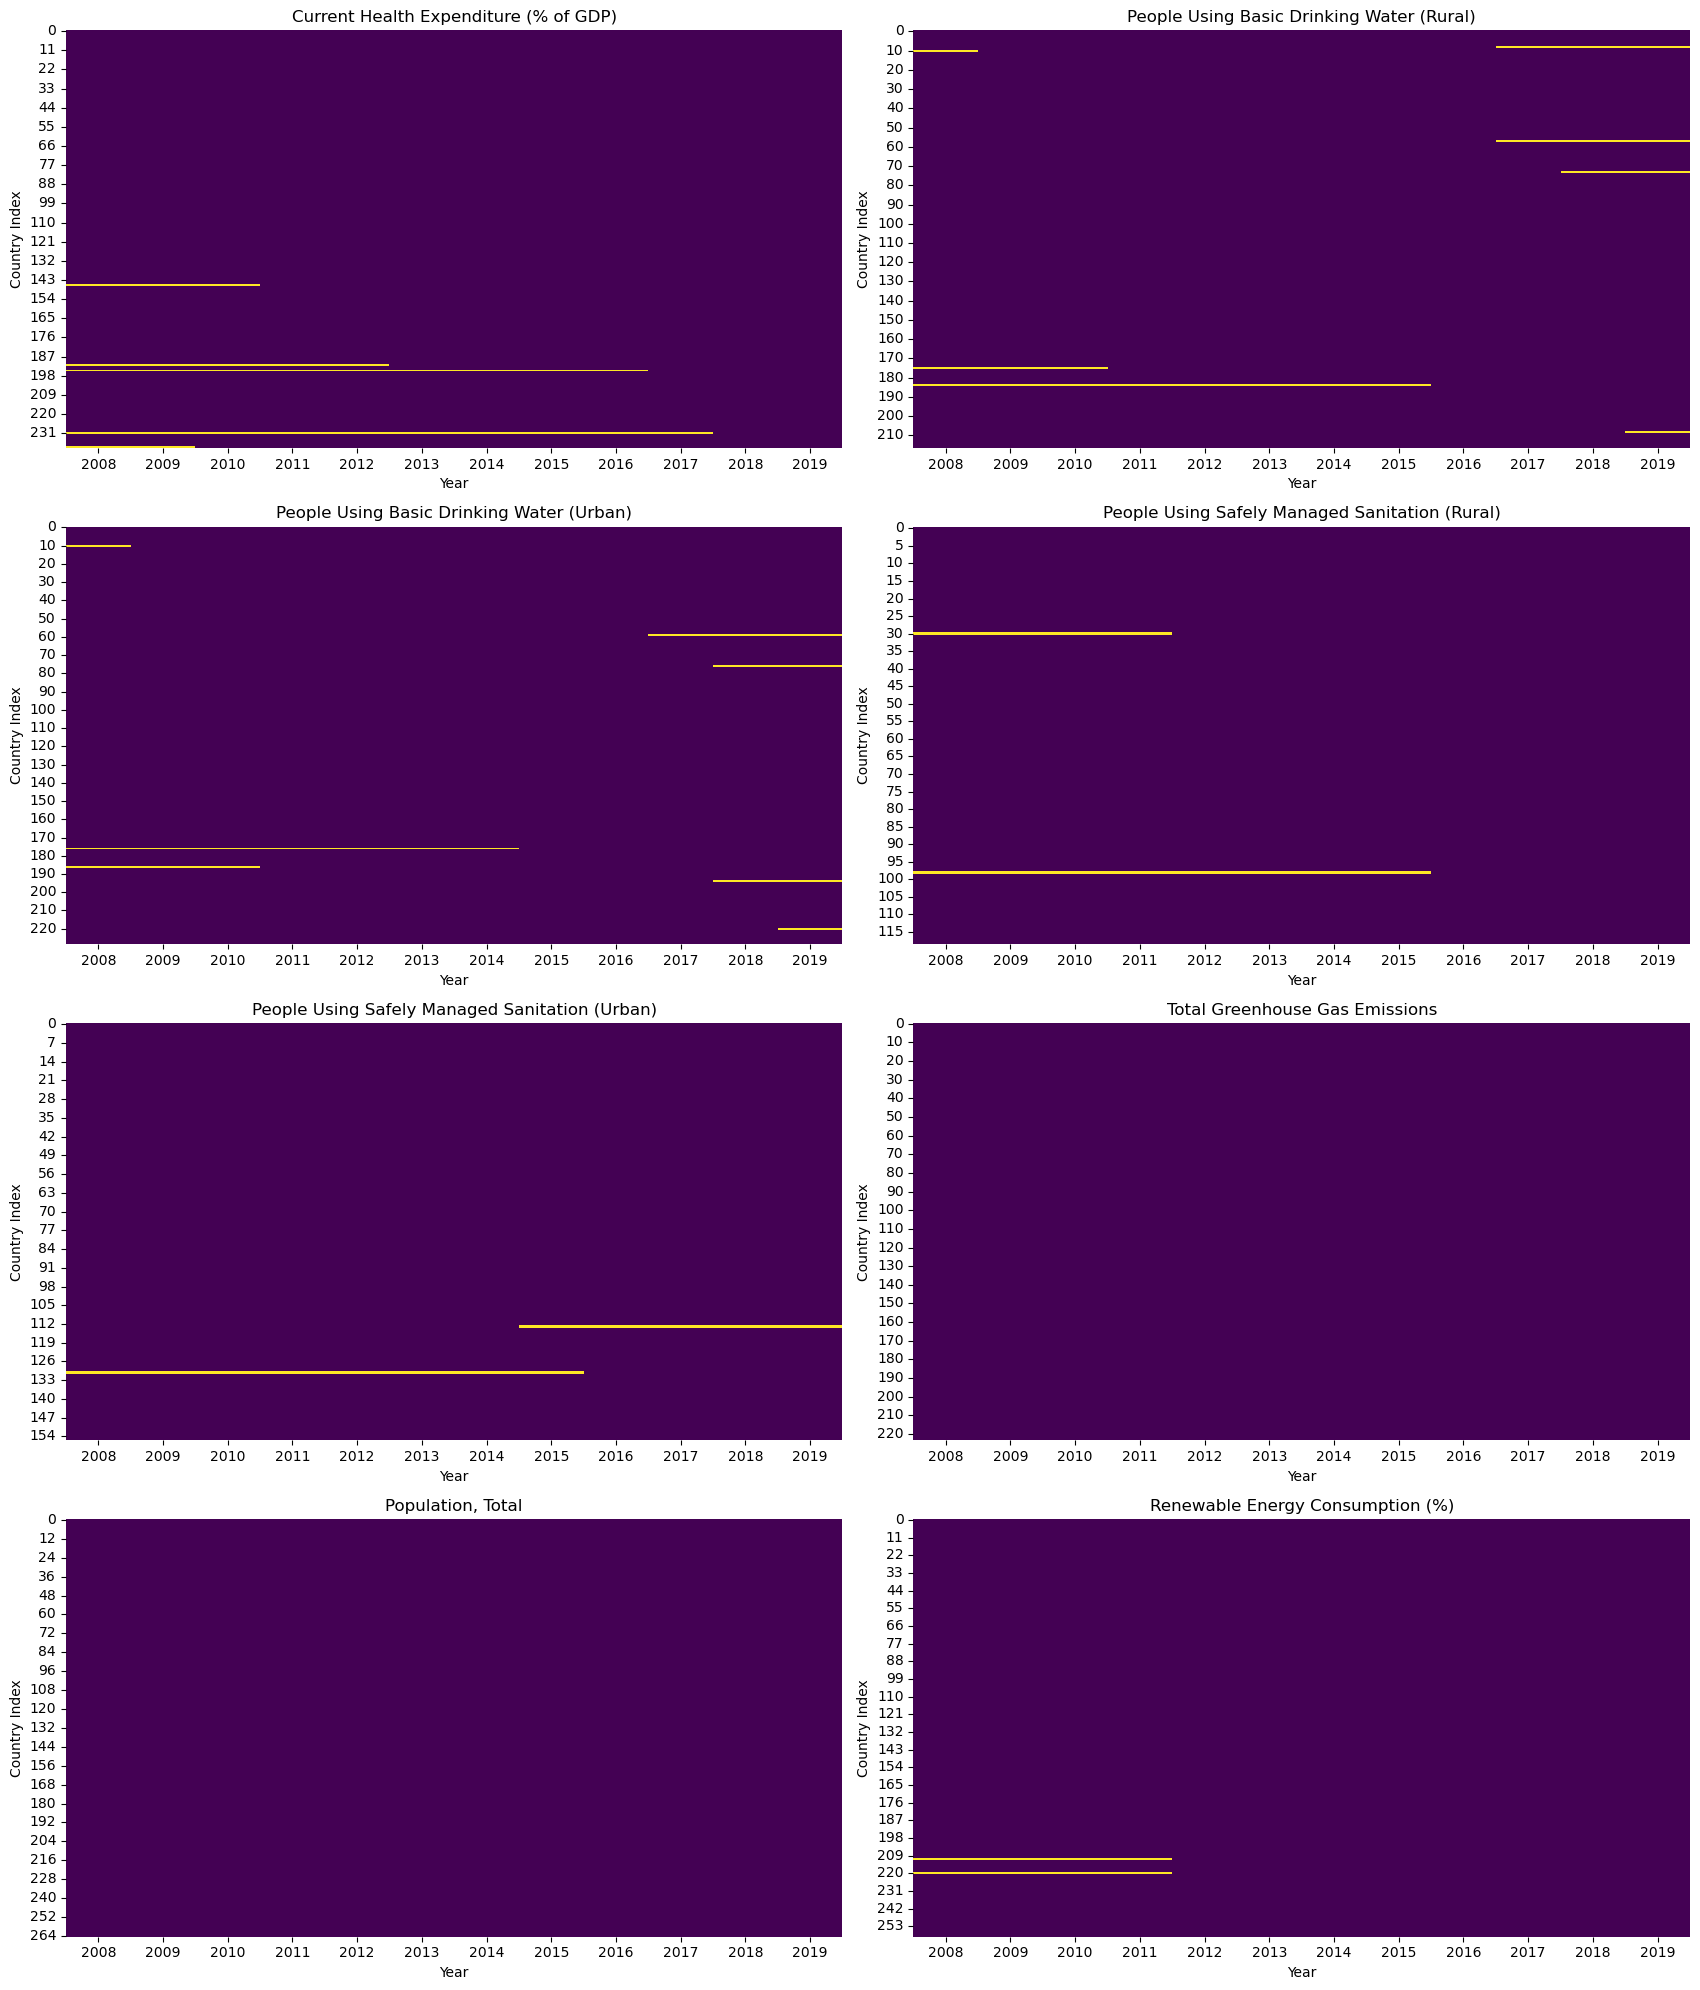

In [29]:
# Tuple of all cleaned DataFrames
all_dfs = (df_che4, df_wr4, df_wu4, df_sr4, df_su4, df_gem4, df_pop4, df_ren4)
titles = [
    "Current Health Expenditure (% of GDP)",
    "People Using Basic Drinking Water (Rural)",
    "People Using Basic Drinking Water (Urban)",
    "People Using Safely Managed Sanitation (Rural)",
    "People Using Safely Managed Sanitation (Urban)",
    "Total Greenhouse Gas Emissions",
    "Population, Total",
    "Renewable Energy Consumption (%)"
]

# Create figure and subplots
fig, axes = plt.subplots(4, 2, figsize=(18, 20))
axes = axes.flatten()  # Flatten 4x2 grid to 1D for easy iteration

for i, df in enumerate(all_dfs):
    year_cols = df.columns[4:]  # years start from 5th column
    sns.heatmap(
        df[year_cols].isna(),
        cmap="viridis",
        cbar=False,  # Remove the continuous colorbar, it doesn't make any sense
        ax=axes[i]
    )
    axes[i].set_title(titles[i], fontsize=12)
    axes[i].set_xlabel("Year")
    axes[i].set_ylabel("Country Index")

plt.tight_layout(rect=[0, 0, 0.95, 1])  # Adjust layout to fit legend
plt.show()

The heatmaps above are very helpful, as they clearly show the remaining missing values without causing confusion. It can be seen that pop and gem have no remaining NaNs. Additionally, the other six datasets each have a few countries with some missing values.

### Current Health Expenditure (% of GDP)

In [30]:
# Display the remaining countries with NaNs (che)
df_che4[df_che4[year_cols].isna().sum(axis=1) > 0]

,Country Name,Country Code,Indicator Name,Indicator Code,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
146,Montenegro,MNE,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,NaN,NaN,NaN,7.966922,8.295505,8.471446,8.000868,9.021888,8.633030,7.982554,8.343555,8.329832
192,Somalia Fed. Rep.,SOM,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,NaN,NaN,NaN,NaN,NaN,2.818393,2.715613,2.842920,2.275338,2.433610,2.371698,2.190595
195,South Sudan,SSD,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.957304,10.056500,9.037411
231,Venezuela RB,VEN,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.416913,2.185637
239,Zimbabwe,ZWE,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,NaN,NaN,10.475839,8.082884,6.917949,7.109403,8.132273,7.449827,7.466447,6.172785,4.655271,3.232678


Looking at the remaining countries with missing values, two stand out. South Sudan is missing 9 out of 12 years. This makes sense because the country only became independent in 2011, and its civil war from 2013 to 2018 further disrupted data collection. Venezuela is missing 10 out of 12 years, likely due to the economic and political crises that affected its reporting during this period. For both countries, trying to fill the gaps with interpolation would be more guesswork than reliable data, so it’s best to drop them.

In [31]:
# Drop Venezuela and South Sudan
df_che5 = df_che4[~(df_che4[year_cols].isna().sum(axis=1) > 8)].reset_index(drop=True)

For Montenegro, Somalia and Zimbabwe, the missing values appear at the beginning of the time series. Because there is no earlier information to reveal a clear trend, any imputation would be speculative. We therefore keep these values as NaN. Visualizations and models naturally start from the first available year for each country, so the analysis remains valid without introducing artificial trends. This approach is transparent, avoids unsupported assumptions and preserves the integrity of the dataset.

### People Using Basic Drinking Water (Rural)

In [32]:
# Display the remaining countries with NaNs (wr)
df_wr4[df_wr4[year_cols].isna().sum(axis=1) > 0]

,Country Name,Country Code,Indicator Name,Indicator Code,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
8,Argentina,ARG,People using at least basic drinking water ser...,SH.H2O.BASW.RU.ZS,87.457334,88.838915,90.220497,91.602079,92.983660,92.983660,92.983660,92.983660,92.983660,NaN,NaN,NaN
10,Antigua and Barbuda,ATG,People using at least basic drinking water ser...,SH.H2O.BASW.RU.ZS,NaN,98.348956,98.348956,98.348956,98.348956,98.348956,98.348956,98.348956,98.348956,98.348956,98.348956,98.348956
57,Eritrea,ERI,People using at least basic drinking water ser...,SH.H2O.BASW.RU.ZS,28.864734,28.598945,28.333155,28.067366,27.801576,27.801576,27.801576,27.801576,27.801576,NaN,NaN,NaN
73,Equatorial Guinea,GNQ,People using at least basic drinking water ser...,SH.H2O.BASW.RU.ZS,33.819124,33.210373,32.601622,31.992871,31.384120,30.775369,30.775369,30.775369,30.775369,30.775369,NaN,NaN
175,South Sudan,SSD,People using at least basic drinking water ser...,SH.H2O.BASW.RU.ZS,NaN,NaN,NaN,38.766466,38.359057,37.883306,37.339214,36.726780,36.046004,35.296887,34.479429,33.593629
184,Turks and Caicos Islands,TCA,People using at least basic drinking water ser...,SH.H2O.BASW.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.788106,91.788106,91.788106,91.788106
208,St. Vincent and the Grenadines,VCT,People using at least basic drinking water ser...,SH.H2O.BASW.RU.ZS,96.289486,96.406266,96.523046,96.639826,96.756606,96.873386,96.990166,96.990166,96.990166,96.990166,96.990166,NaN


In [33]:
# Drop Turks and Caicos Islands	
df_wr5 = df_wr4[~(df_wr4['Country Name'] == 'Turks and Caicos Islands')].reset_index(drop=True)

For Argentina, Eritrea, Equatorial Guinea, and St. Vincent and the Grenadines in the “People Using Basic Drinking Water (Rural)” dataset, the missing values occur at the end of the time series (2017–2019). The preceding years show a stable trend. In this context, forward filling (ffill) is a reasonable approach, as it assumes that the percentage remains consistent in the missing years, which aligns with the gradual or stable behavior of this indicator and avoids introducing unrealistic fluctuations.

In [34]:
# Forward fill missing values for the year columns
year_cols = [str(y) for y in range(2008, 2020)]
df_wr5.loc[df_wr5['Country Name'] == 'Argentina', year_cols] = df_wr5.loc[df_wr5['Country Name'] == 'Argentina', year_cols].ffill(axis=1)
df_wr5.loc[df_wr5['Country Name'] == 'Eritrea', year_cols] = df_wr5.loc[df_wr5['Country Name'] == 'Eritrea', year_cols].ffill(axis=1)
df_wr5.loc[df_wr5['Country Name'] == 'Equatorial Guinea', year_cols] = df_wr5.loc[df_wr5['Country Name'] == 'Equatorial Guinea', year_cols].ffill(axis=1)
df_wr5.loc[df_wr5['Country Name'] == 'St. Vincent and the Grenadines', year_cols] = df_wr5.loc[df_wr5['Country Name'] == 'St. Vincent and the Grenadines', year_cols].ffill(axis=1)

### People Using Basic Drinking Water (Urban)

In [36]:
# Display the remaining countries with NaNs (wu)
df_wu4[df_wu4[year_cols].isna().sum(axis=1) > 0]

,Country Name,Country Code,Indicator Name,Indicator Code,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
10,Antigua and Barbuda,ATG,People using at least basic drinking water ser...,SH.H2O.BASW.UR.ZS,NaN,98.414580,98.414580,98.414580,98.414580,98.414580,98.414580,98.414580,98.414580,98.414580,98.414580,98.414580
59,Eritrea,ERI,People using at least basic drinking water ser...,SH.H2O.BASW.UR.ZS,89.994055,89.930097,89.866140,89.802182,89.738225,89.738225,89.738225,89.738225,89.738225,NaN,NaN,NaN
76,Equatorial Guinea,GNQ,People using at least basic drinking water ser...,SH.H2O.BASW.UR.ZS,72.650381,73.735906,74.821431,75.906956,76.992481,78.078006,78.078006,78.078006,78.078006,78.078006,NaN,NaN
176,Saudi Arabia,SAU,People using at least basic drinking water ser...,SH.H2O.BASW.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.406400,98.406400,98.406400,98.406400,98.406400
186,South Sudan,SSD,People using at least basic drinking water ser...,SH.H2O.BASW.UR.ZS,NaN,NaN,NaN,52.058144,54.158256,56.299749,58.482623,60.706877,62.972513,65.279529,67.627926,70.017704
194,Sint Maarten (Dutch part),SXM,People using at least basic drinking water ser...,SH.H2O.BASW.UR.ZS,95.783231,95.688821,95.594410,95.500000,95.405590,95.311179,95.311179,95.311179,95.311179,95.311179,NaN,NaN
220,St. Vincent and the Grenadines,VCT,People using at least basic drinking water ser...,SH.H2O.BASW.UR.ZS,97.186357,97.389345,97.592333,97.795321,97.998309,98.201297,98.404285,98.404285,98.404285,98.404285,98.404285,NaN


In [37]:
# Drop Saudi Arabia
df_wu5 = df_wu4[~(df_wu4['Country Name'] == 'Saudi Arabia')].reset_index(drop=True)

In [38]:
# Forward fill missing values for the year columns
year_cols = [str(y) for y in range(2008, 2020)]
df_wu5.loc[df_wu5['Country Name'] == 'Sint Maarten (Dutch part)', year_cols] = df_wu5.loc[df_wu5['Country Name'] == 'Sint Maarten (Dutch part)', year_cols].ffill(axis=1)
df_wu5.loc[df_wu5['Country Name'] == 'Eritrea', year_cols] = df_wu5.loc[df_wu5['Country Name'] == 'Eritrea', year_cols].ffill(axis=1)
df_wu5.loc[df_wu5['Country Name'] == 'Equatorial Guinea', year_cols] = df_wu5.loc[df_wu5['Country Name'] == 'Equatorial Guinea', year_cols].ffill(axis=1)
df_wu5.loc[df_wu5['Country Name'] == 'St. Vincent and the Grenadines', year_cols] = df_wu5.loc[df_wu5['Country Name'] == 'St. Vincent and the Grenadines', year_cols].ffill(axis=1)

### People Using Safely Managed Sanitation (Rural)

In [40]:
# Display the remaining countries with NaNs (sr)
df_sr4[df_sr4[year_cols].isna().sum(axis=1) > 0]

,Country Name,Country Code,Indicator Name,Indicator Code,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
30,Fragile and conflict affected situations,FCS,People using safely managed sanitation service...,SH.STA.SMSS.RU.ZS,NaN,NaN,NaN,NaN,19.361526,19.462454,19.562954,19.662145,19.757890,19.853066,19.952962,20.056218
98,Turks and Caicos Islands,TCA,People using safely managed sanitation service...,SH.STA.SMSS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.871423,43.871423,43.871423,43.871423


In [41]:
# Drop Turks and Caicos Islands	
df_sr5 = df_sr4[~(df_sr4['Country Name'] == 'Turks and Caicos Islands')].reset_index(drop=True)

In [42]:
# Display the remaining countries with NaNs (wu)
df_sr5[df_sr5[year_cols].isna().sum(axis=1) > 0]

,Country Name,Country Code,Indicator Name,Indicator Code,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
30,Fragile and conflict affected situations,FCS,People using safely managed sanitation service...,SH.STA.SMSS.RU.ZS,NaN,NaN,NaN,NaN,19.361526,19.462454,19.562954,19.662145,19.75789,19.853066,19.952962,20.056218


### People Using Safely Managed Sanitation (Urban)

In [43]:
# Display the remaining countries with NaNs (su)
df_su4[df_su4[year_cols].isna().sum(axis=1) > 0]

,Country Name,Country Code,Indicator Name,Indicator Code,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
113,Pacific island small states,PSS,People using safely managed sanitation service...,SH.STA.SMSS.UR.ZS,40.336632,40.299413,40.254215,40.156591,40.041558,39.926763,39.811087,NaN,NaN,NaN,NaN,NaN
130,Turks and Caicos Islands,TCA,People using safely managed sanitation service...,SH.STA.SMSS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.324491,33.324491,33.324491,33.324491


In [44]:
# Drop Turks and Caicos Islands	
df_su5 = df_su4[~(df_su4['Country Name'] == 'Turks and Caicos Islands')].reset_index(drop=True)

### Renewable Energy Consumption (%)

In [45]:
# Display the remaining countries with NaNs (su)
df_ren4[df_ren4[year_cols].isna().sum(axis=1) > 0]

,Country Name,Country Code,Indicator Name,Indicator Code,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
211,South Sudan,SSD,Renewable energy consumption (% of total final...,EG.FEC.RNEW.ZS,NaN,NaN,NaN,NaN,30.6,30.1,29.4,27.5,28.7,35.1,31.5,31.4
220,Sint Maarten (Dutch part),SXM,Renewable energy consumption (% of total final...,EG.FEC.RNEW.ZS,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
